In [1]:
# Scikit-learn
#Clasificacion:
# Aprendizaje supervisado: con un refuerzo (niño se electrocuta o cuando nos enseñan las tablas)
# Aprendizaje no supervisado: 
#       AGENTE: Cumple como misiones
# Problemas de clasificacion: clasificación de clientes (cadena de estados unidos segun las compras que ve que clase de cliente
# es y te manda ofertas)x
# FUNCION DE ACTIVACION: Es como la condicion para saber que valores cumplen o no. Que nos permite dividir en regiones los datos.

# BIBLIOTECAS A UTILIZAR
# - Numpy, matplotlib scikit learn, pandas, seaborn.

In [2]:
## Procesamiento - clasificadores
# Lo podemos usar en diversos entornos o clasificaciones, lo primero que tenemos que indagar es que variables son las mas utiles
# para la clasificacion, y ya despues lo entrenamos

In [3]:
# Cargar múdulos necesarios
import pandas as pd
import numpy as np
import seaborn as sns # para graficas
import matplotlib.pyplot as plt # para graficas

In [4]:
# Cargar el conjunto de datos 
data = sns.load_dataset('iris') # Tabla de datos
data.head(5) # mostramos los primeros 5 datos de la tabla


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Resumend de datos / analisis descriptivo / variables tipo cuantitativo
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# ver cuantos datos hay de cada uno
# Distribucion de cada clase
data.groupby('species').size() # en el estudio hay 50 muestras de cada uno

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [7]:
# Carga de bibliotecas especificas para modelos de IA
from sklearn.model_selection import train_test_split # es una funcion que sirve para separar un conjunto en un grupo de prueba 
# y entrenamiento, solo le decimos que % queremos cual es para cada uno.

In [8]:
# Separacion de datos en grupo de entrenamiento y prueba
# el modulo deveuelve dos listas una de entreno y otra de pruebas
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 19) # ingresamos los datos y cuando % queremos para entreno y despues para que informacion queremos la info, en este caso las especias, y metemos una semilla para obtener los mismos datos
train.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
68,6.2,2.2,4.5,1.5,versicolor
0,5.1,3.5,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
108,6.7,2.5,5.8,1.8,virginica
14,5.8,4.0,1.2,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
20,5.4,3.4,1.7,0.2,setosa
118,7.7,2.6,6.9,2.3,virginica


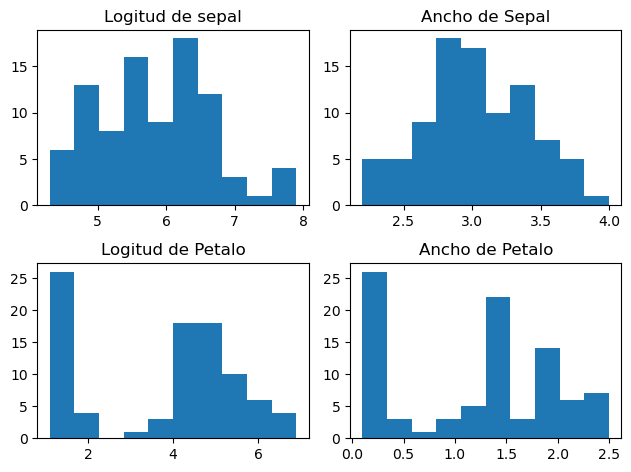

In [9]:
## ANALISIS EXPLORATORIO
# usaremos histogramas para observar la distribucion de los 4 atributos 
n_bins = 10
fig, axs = plt.subplots(2,2) # generamos el grafico de 2x2 donde se va a mostrar caracteristicas de cada una de las variables
axs[0,0].hist(train['sepal_length'], bins = n_bins)
axs[0,0].set_title("Logitud de sepal")

axs[0,1].hist(train['sepal_width'], bins = n_bins)
axs[0,1].set_title("Ancho de Sepal")

axs[1,0].hist(train['petal_length'], bins = n_bins)
axs[1,0].set_title("Logitud de Petalo")

axs[1,1].hist(train['petal_width'], bins = n_bins)
axs[1,1].set_title("Ancho de Petalo")

fig.tight_layout(pad = 1.0) # vamos a darles medidas de separacion

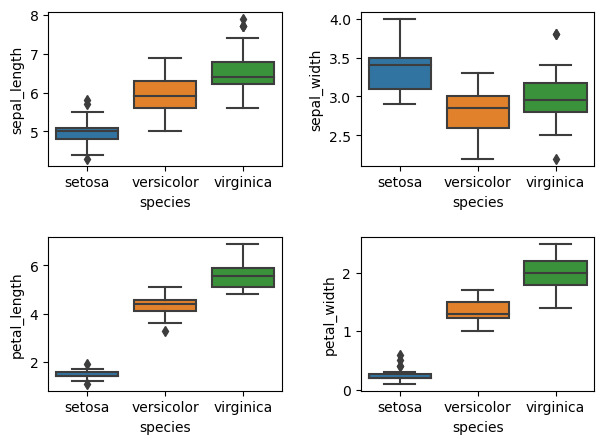

In [10]:
# Diagramas Box-Plot
fn = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cn = ['setosa', 'versicolor', 'virginica']

fig, axs = plt.subplots(2,2) # creamos contendores

sns.boxplot(x = 'species', y = fn[0], data=train, order=cn, ax=axs[0,0])
sns.boxplot(x = 'species', y = fn[1], data=train, order=cn, ax=axs[0,1])
sns.boxplot(x = 'species', y = fn[2], data=train, order=cn, ax=axs[1,0])
sns.boxplot(x = 'species', y = fn[3], data=train, order=cn, ax=axs[1,1])

fig.tight_layout(pad = 2.0)

<Axes: xlabel='species', ylabel='petal_length'>

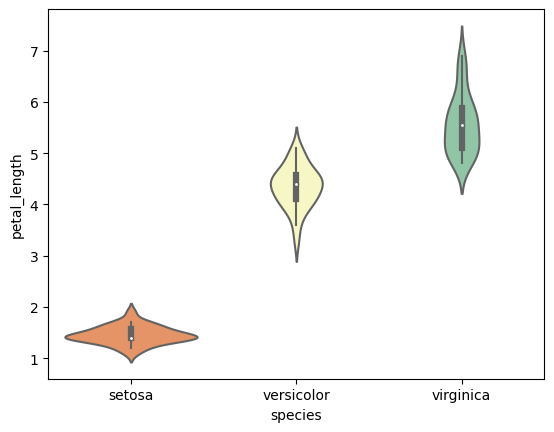

In [11]:
## DIAGRAMAS DE VIOLIN 
sns.violinplot(x='species', y=fn[2], data=train, size=5, order=cn,palette='Spectral')

C:\Users\andre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


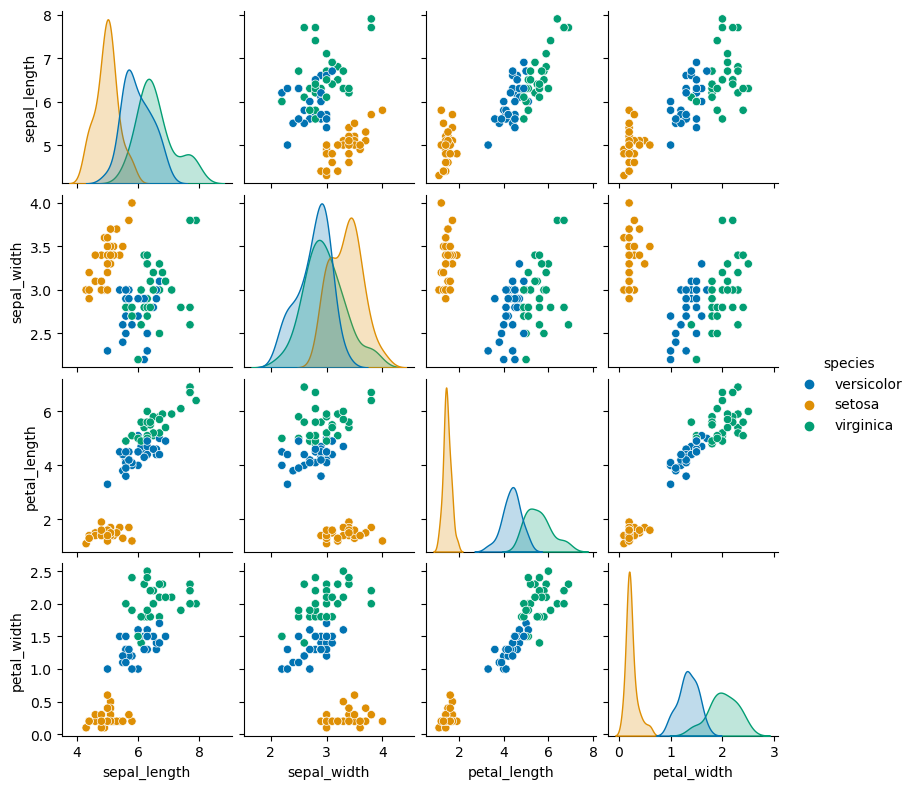

In [12]:
# grafica de diagrama de dispercion de atributos emparejados
sns.pairplot(train, hue='species', height =2, palette = 'colorblind')

In [13]:
# MATRIZ DE CORRELACION
corrmat = train.corr(numeric_only = True)
corrmat


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.170714,0.881815,0.828909
sepal_width,-0.170714,1.000000,-0.427169,-0.352479
petal_length,0.881815,-0.427169,1.000000,0.964360
petal_width,0.828909,-0.352479,0.964360,1.000000


<Axes: >

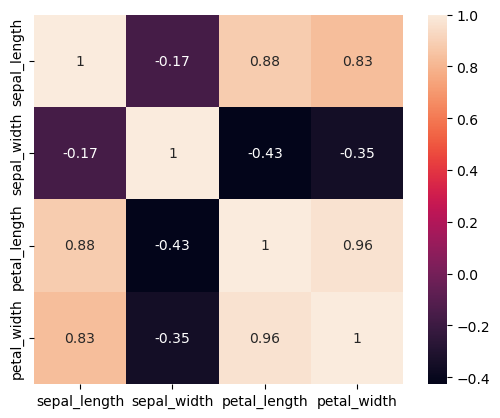

In [14]:
# con mapa de calor
sns.heatmap(corrmat, annot = True, square = True)

<Axes: >

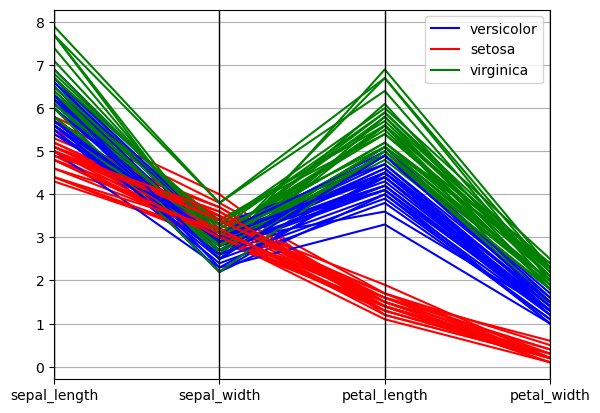

In [15]:
pd.plotting.parallel_coordinates(train, 'species', color = ['blue', 'red', 'green'])

In [16]:
# VAMOS A HACER UN ARBOL DE DECISION para clasificacion


### Separacion de la Etiqueta de clase y atributos o parametros

In [17]:
x_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train['species']

x_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test['species']

print(x_train.head(5))
print(y_train.head(5))

     sepal_length  sepal_width  petal_length  petal_width
68            6.2          2.2           4.5          1.5
0             5.1          3.5           1.4          0.2
27            5.2          3.5           1.5          0.2
8             4.4          2.9           1.4          0.2
108           6.7          2.5           5.8          1.8
68     versicolor
0          setosa
27         setosa
8          setosa
108     virginica
Name: species, dtype: object


## Creacion del modelo 

In [18]:
# CARGAR BIBLIOTECAS ESPECIFICAS 
from sklearn.tree import DecisionTreeClassifier, plot_tree # Cargamos el arbol de desicion y el plot_tree es para graficarlo 

In [19]:
# GENERAMOS EL MODELO DE ARBOL DE DECISION
mot_dt = DecisionTreeClassifier(max_depth=3, random_state=1)
mot_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

## Visualizacion

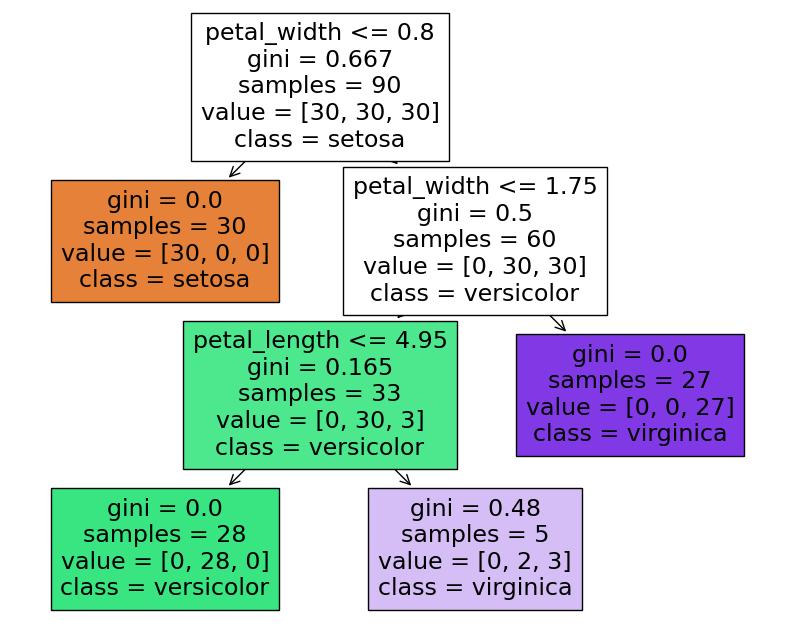

In [20]:
plt.figure(figsize=(10,8))
plot_tree(mot_dt, feature_names=list(mot_dt.feature_names_in_), class_names=cn, filled=True);

### Verificacion del modelo

#### Predecir resultados utilizando el modelo

In [21]:
prediccion = mot_dt.predict(x_test)

In [22]:
# Modulo para metricas de eficiencia del modelo
from sklearn import metrics

In [23]:
print('La precision del arbol de decision es: {:.3f}'.format(metrics.accuracy_score(prediccion, y_test)))

La precision del arbol de decision es: 0.967


## IMPORTANCIA DE CADA PREDICTOR

In [25]:
mot_dt.feature_importances_

array([0.       , 0.       , 0.0530303, 0.9469697])

In [28]:
mot_dt.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [31]:
importacia_dt = pd.DataFrame({'Caracteristica': mot_dt.feature_names_in_,
                             'Importancia': mot_dt.feature_importances_})

In [33]:
print(importacia_dt)

  Caracteristica  Importancia
0   sepal_length      0.00000
1    sepal_width      0.00000
2   petal_length      0.05303
3    petal_width      0.94697
